In [1]:
import tensorflow as tf
import numpy as np
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_x_dim = x_train.shape[1]
input_y_dim = x_train.shape[2]
input_dim = input_x_dim * input_y_dim

x_train = np.reshape(x_train, (len(x_train), input_dim))
x_test = np.reshape(x_test, (len(x_test), input_dim))

hidden_code_dim = 16

In [2]:
from mlp_vae import MLPVariationalAutoEncoder

In [3]:
model = MLPVariationalAutoEncoder(input_dim, hidden_code_dim, [512, 128])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [4]:
history = model.fit(x_train, x_train, batch_size=1024, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 46us/sample - loss: 2.3780 - val_loss: 0.1692
Epoch 2/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.1025 - val_loss: 0.1322
Epoch 3/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0951 - val_loss: 0.1322
Epoch 4/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0917 - val_loss: 0.1275
Epoch 5/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0907 - val_loss: 0.1233
Epoch 6/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0889 - val_loss: 0.1267
Epoch 7/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0880 - val_loss: 0.1253
Epoch 8/50
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0867 - val_loss: 0.1242
Epoch 9/50
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0919 - val_l

In [5]:
import matplotlib.pyplot as plt
import random

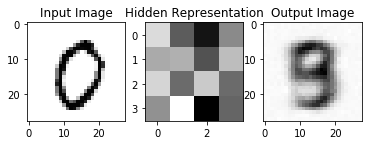

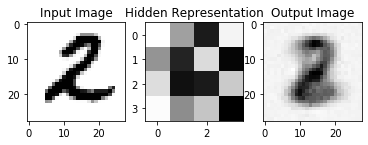

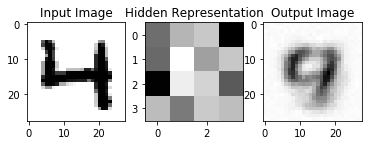

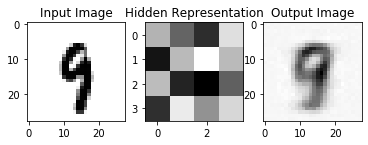

In [6]:
for _ in range(4):
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    test_case = x_test[random.randrange(x_test.shape[0])]
    test_case_img = np.reshape(test_case, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(test_case_img, cmap='Greys')

    plt.subplot(1, 3, 2)
    plt.title("Hidden Representation")
    encoded_dist = model.encode(np.array([test_case]))
    encoded = encoded_dist.sample()
    # The reshape command makes the 16-long hidden code by 4x4
    # so we can see it alongside the input and output
    encoded_img = np.reshape(tf.nn.sigmoid(encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(encoded_img, cmap='Greys')

    plt.subplot(1, 3, 3)
    plt.title("Output Image")
    decoded = model.decode(np.array([encoded]))
    decoded_img = np.reshape(decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(decoded_img, cmap='Greys')

    plt.show()

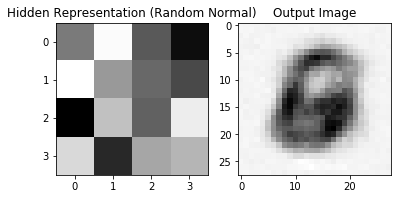

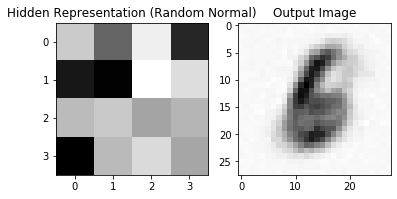

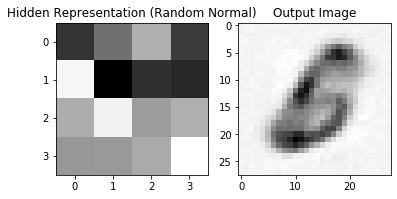

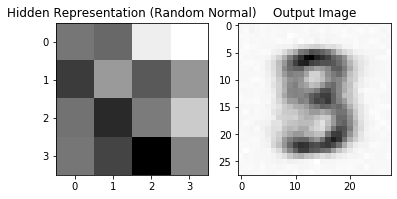

In [7]:
for _ in range(4):
    plt.subplot(1, 2, 1)
    plt.title("Hidden Representation (Random Normal)")
    random_encoded = tf.random.normal((1, 16))
    random_encoded_img = np.reshape(tf.nn.sigmoid(random_encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(random_encoded_img, cmap='Greys')

    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    random_decoded = model.decode(np.array([random_encoded]))
    random_decoded_img = np.reshape(random_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(random_decoded_img, cmap='Greys')

    plt.show()

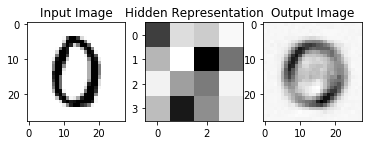

In [9]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_1 = x_test[random.randrange(x_test.shape[0])]
test_case_img_1 = np.reshape(test_case_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_1, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_1 = model.encode(np.array([test_case_1]))
encoded_1 = encoded_dist_1.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_1 = tf.reshape(tf.nn.sigmoid(encoded_1), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_1, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_1 = model.decode(np.array([encoded_1]))
decoded_img_1 = tf.reshape(decoded_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_1, cmap='Greys')

plt.show()

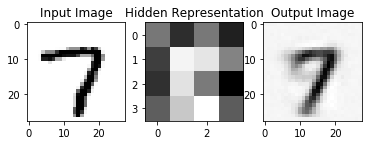

In [20]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_2 = x_test[random.randrange(x_test.shape[0])]
test_case_img_2 = np.reshape(test_case_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_2, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_2 = model.encode(np.array([test_case_2]))
encoded_2 = encoded_dist_2.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_2 = np.reshape(tf.nn.sigmoid(encoded_2), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_2, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_2 = model.decode(np.array([encoded_2]))
decoded_img_2 = np.reshape(decoded_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_2, cmap='Greys')

plt.show()

In [21]:
new_encoded = (encoded_1 + encoded_2) / 2

In [22]:
new_encoded

<tf.Tensor: id=10528, shape=(1, 16), dtype=float32, numpy=
array([[ 0.8075848 ,  0.3220586 , -0.0045695 ,  0.06877708,  0.4913863 ,
        -1.4470868 ,  0.69325113,  0.41268393,  0.08091599, -0.39429134,
         0.4303833 ,  0.5448204 ,  0.26362908,  0.63046587, -0.75526357,
        -0.04322022]], dtype=float32)>

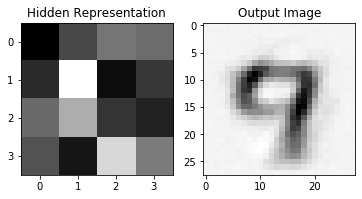

In [24]:
plt.subplot(1, 2, 1)
plt.title("Hidden Representation")
new_encoded_img = np.reshape(tf.nn.sigmoid(new_encoded), (1, 4, 4))[0] * 255.0
plt.imshow(new_encoded_img, cmap='Greys')

plt.subplot(1, 2, 2)
plt.title("Output Image")
new_decoded = model.decode(np.array([new_encoded]))
new_decoded_img = np.reshape(new_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(new_decoded_img, cmap='Greys')

plt.show()